# Análise dos dados de sinistro de trânsito ocorridos no Brasil em comparação com os sinistros ocorridos no DF
Nesse projeto, analisarei um tema que ocorre muito frequentemente com quem vem de outro estado para o Distrito Federal, que é as pessoas acharem que os motoristas daqui não dirigem tão bem.

Para comprovar a veracidade ou falsidade desse fato, muitas variáveis entram em questão, mas como só alguns dados públicos de trânsito estão disponíveis,<br> irei analisar em vista da quantidade de acidentes em cada estado. Utilizando o Registro Nacional de Acidentes e Estatísticas de Trânsito de 01/2020 até 12/2022, publicado pelo Senatran e disponível no link:<br>
https://www.gov.br/transportes/pt-br/assuntos/transito/conteudo-Senatran/registro-nacional-de-acidentes-e-estatisticas-de-transito.

Como utilizarei as informações de um só banco de dados, e não analisarei tantas variáveis assim, as conclusões podem ser alteradas e muitas dessas conclusões podem não condizer com a verdade vista na prática.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
datag = pd.read_csv('acidentes.csv', delimiter = ';', low_memory = False)


In [8]:
datag = datag.reset_index(drop = True)
datag['dia_semana'] = datag['dia_semana'].str.split('-').str[0]

estados = ['DF', 'SP', 'MG', 'GO']
filtered = datag[datag['uf_acidente'].isin(estados)]

Após lermos o arquivo CSV baixado no link, escolheremos os estados que serão utilizados como comparativo, já que é uma atividade extensa e pouco produtiva comparar <br>
todos os estados do Brasil. 

Para isso escolhi 4 estados, o Distrito Federal que é alvo da pesquisa, Goiás que é um estado de grande magnitude e importância rodoviária <br>
situado no Centro-Oeste, Minas Gerais por ser o estado do Brasil com maior número de acidentes por ano e São Paulo por ser o estado com maior população e maior número <br>
de veículos automóveis.

Aqui também decidi por eliminar algumas colunas que não serão de grande utilidade para a nossa análise já que as mesmas possuem muitas células vazias.

In [9]:
print(filtered.isnull().sum())

print(datag.isnull().sum())

num_acidente                  0
chv_localidade                0
data_acidente                 0
uf_acidente                   0
ano_acidente                  0
mes_acidente                  0
mes_ano_acidente              0
codigo_ibge                   0
dia_semana                    0
fase_dia                      0
tp_acidente                   0
cond_meteorologica            0
end_acidente              76698
num_end_acidente              0
cep_acidente                  0
bairro_acidente          943742
km_via_acidente               0
latitude_acidente       1810326
longitude_acidente      1810455
hora_acidente                 0
tp_rodovia                    0
cond_pista                    0
tp_cruzamento                 0
tp_pavimento                  0
tp_curva                      0
lim_velocidade                0
tp_pista                      0
ind_guardrail                 0
ind_cantcentral               0
ind_acostamento               0
qtde_acidente                 0
qtde_aci

In [10]:

columns_to_drop = ['latitude_acidente','longitude_acidente','ind_guardrail', 'ind_acostamento', 'lim_velocidade','bairro_acidente','end_acidente','cep_acidente', 'tp_pavimento','tp_acidente', 'tp_cruzamento', 'chv_localidade']

filtered = filtered.drop(columns=columns_to_drop)
datag = datag.drop(columns = columns_to_drop)


 Transformando as colunas de data nos dois dataframes presentes para datetime, de forma que possamos utilizar as datas de forma cronológica,<br>
 sem termos que tratar strings.
 
 Criando também as colunas "ano" e "mes".

In [11]:
filtered['data_acidente'] = pd.to_datetime(filtered['data_acidente'])
filtered['ano'] = filtered['data_acidente'].dt.year
filtered['mes'] = filtered['data_acidente'].dt.month

datag['data_acidente'] = pd.to_datetime(datag['data_acidente'])
datag['ano'] = datag['data_acidente'].dt.year
datag['mes'] = datag['data_acidente'].dt.month

Filtrando os anos escolhidos, uma vez que os anos de 2018, 2019 e 2023 apresentam dados alterados demais ou incompletos.

In [12]:
filtered = filtered[~filtered['ano'].isin([2018, 2019, 2023])]

datag = datag[~datag['ano'].isin([2018, 2019, 2023])]
datag.head()


,num_acidente,data_acidente,uf_acidente,ano_acidente,mes_acidente,mes_ano_acidente,codigo_ibge,dia_semana,fase_dia,cond_meteorologica,...,tp_curva,tp_pista,ind_cantcentral,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos,ano,mes
8823,1340336,2020-01-15,AC,2020,1,12020,1200401,QUARTA,TARDE,CLARO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,2020,1
8824,4420534,2020-01-19,AC,2020,1,12020,1200302,DOMINGO,MANHA,CLARO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,2020,1
8825,3756210,2020-01-24,AC,2020,1,12020,1200401,SEXTA,TARDE,CLARO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,2020,1
8826,4538411,2020-01-27,AC,2020,1,12020,1200401,SEGUNDA,MANHA,CLARO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,2020,1
8827,654342,2020-01-02,AC,2020,1,12020,1200401,QUINTA,TARDE,CLARO,...,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,2020,1


Criarei um gráfico de pizza para mostrar a porcentagem que cada UF selecionada nesse projeto ocupa no número de sinistros de trânsito.

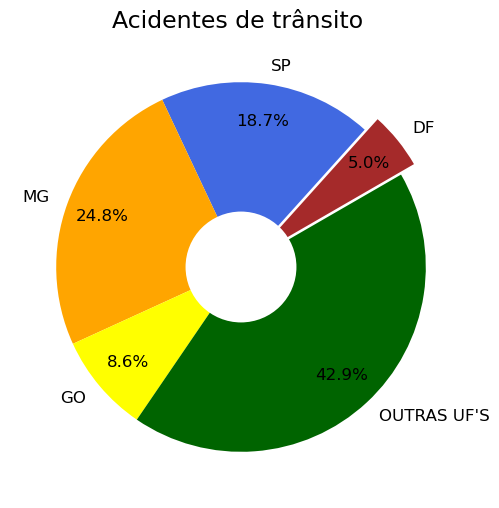

In [13]:
def mautopct(values):
    def sub(pct):
        total = sum(values)
        val = int(round(pct * total / 100))
        return '{p:.1f}%'.format(p=pct, v=val)
    return sub

totalaci = filtered['qtde_acidente'].sum()
totalobi = filtered['qtde_acid_com_obitos'].sum()
datadf = filtered[filtered['uf_acidente'] == 'DF']
datasp = filtered[filtered['uf_acidente'] == 'SP']
datamg = filtered[filtered['uf_acidente'] == 'MG']
datago = filtered[filtered['uf_acidente'] == 'GO']
datab = datag[~datag['uf_acidente'].isin(['DF', 'SP', 'MG', 'GO'])]
totaldf = datadf['qtde_acidente'].sum()
totalsp = datasp['qtde_acidente'].sum()
totalmg = datamg['qtde_acidente'].sum()
totalgo = datago['qtde_acidente'].sum()
totalb = datab['qtde_acidente'].sum()
estados = ['DF', 'SP', 'MG','GO', "OUTRAS UF'S"]
plt.figure(figsize = (20,6))
explode = (0.09,0,0, 0,0)
y = np.array([totaldf,totalsp,totalmg,totalgo, totalb])

colors = ('brown', 'royalblue', 'orange','yellow', 'darkgreen')

plt.pie(y, labels=estados, explode=explode, autopct=mautopct(list(y)),textprops={'fontsize': 12},colors = colors,pctdistance = 0.8, shadow = False, startangle = 30)
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.gca().set_title("Acidentes de trânsito ", fontsize = 17)
plt.show()

Podemos ver que por mais que o DF não ocupa uma porcentagem expressiva no número de acidentes em geral, mas em comparação com o Goias que é um estado de<br>
grande magnitude geográfica e pouca diferença populacional do DF, podemos inferir que há um número elevado de acidentes ocorrendo na capital do Brasil.

Agora analisaremos os dados por cada UF, mostrando o comportamento que a quantidade de sinistros de trânsito obedeceu em cada mês nos anos escolhidos.

<Figure size 1200x1500 with 0 Axes>

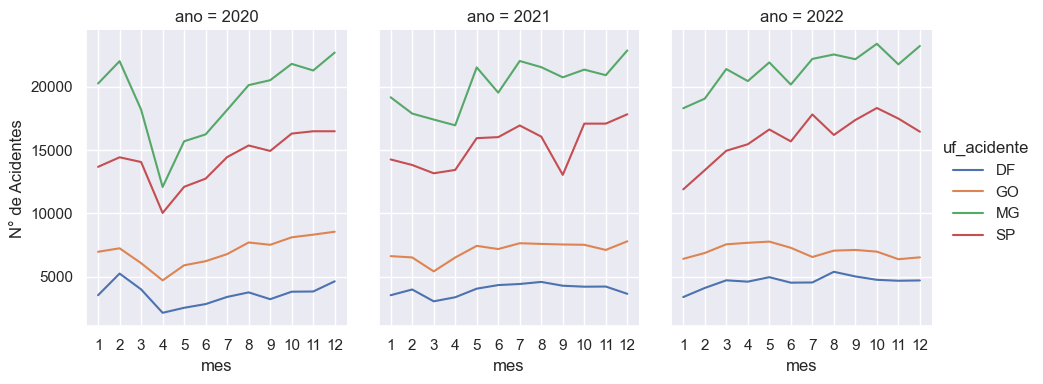

In [14]:

dff = filtered.groupby(['ano', 'mes', 'uf_acidente'])['qtde_acidente'].agg([np.sum])
dff = dff.reset_index()

plt.figure(figsize=(12,15))
sns.set()
fig1 = sns.relplot(
    kind='line',
    data=dff,
    y='sum',
    x='mes',
    hue='uf_acidente',aspect = .8,
    col='ano', col_wrap = len(dff['ano'].unique()) , height = 4)
fig1.set(ylabel = 'Quantidade de Acidents')
months_in_data = dff['mes'].unique()
plt.xticks(ticks=months_in_data, labels=months_in_data)

fig1.set_axis_labels(y_var='N° de Acidentes')
plt.show()


Podemos ver que o DF não segue uma diferença muito grande dos outros estados, na verdade os dados mostram que os estados com os maiores números de sinistros de<br>
trânsito apresentam picos preocupantes em certos meses do ano. E diferente desse padrão, o DF segue uma constância nesse número. <br>

É possível notar alguns eventos olhando pra esses dados, como a diminuição do número de acidentes no início da pandemia de COVID-19 em 2020, e também o leve aumento<br>
desse número que ocorre nos últimos meses do ano em SP e MG devido ao aumento do número de viagens.

In [15]:
x = (datag['qtde_acidente'].sum())
y = (datag['qtde_acid_com_obitos'].sum())

print("porcentagem de acidentes com morte em todo brasil:", 100*(y/x),'%')

porcentagem de acidentes com morte em todo brasil: 2.0733760595551445 %


In [16]:
x = filtered['qtde_acidente'].sum()
y = filtered['qtde_acid_com_obitos'].sum()

print("porcentagem de acidentes com morte nas UF'S selecionadas:", 100*(y/x),'%')

porcentagem de acidentes com morte nas UF'S selecionadas: 1.3053037368947147 %


Buscando tirar conclusões sobre os acidentes nessas regiões específicas comparadas com os dados gerais do Brasil<br>
analisaremos o número de acidentes ocorridos por dia da semana no DF e no resto do Brasil.

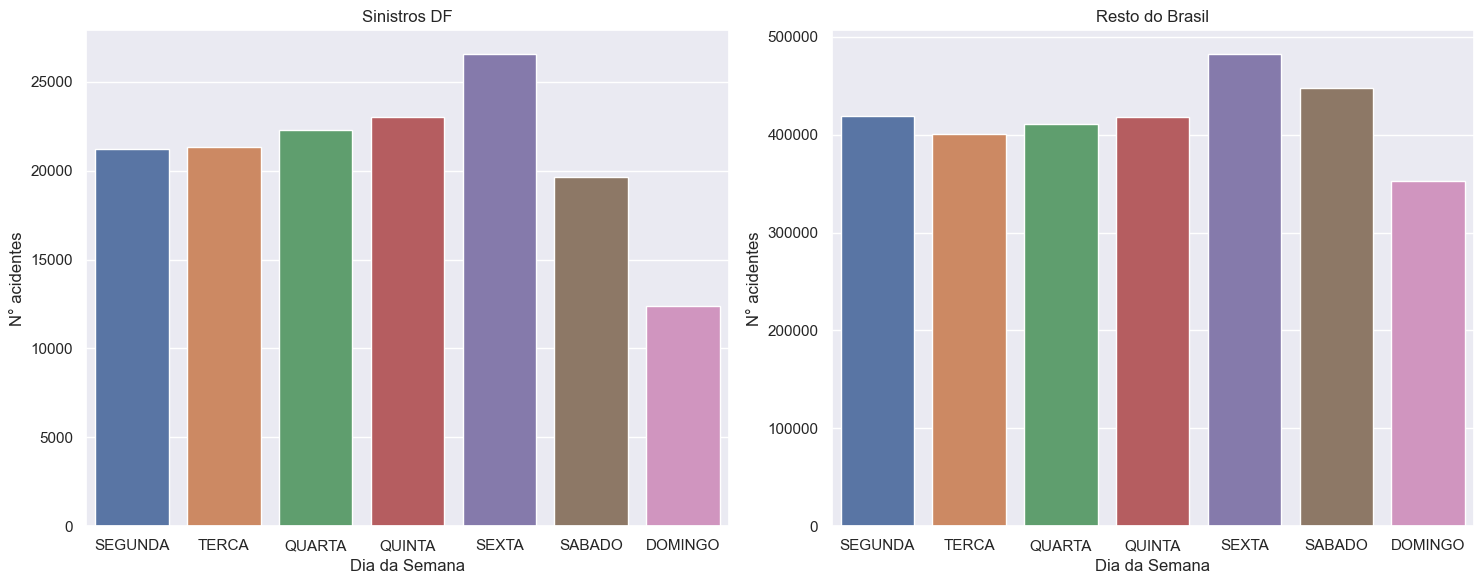

In [17]:
days_order = ['SEGUNDA', 'TERCA', 'QUARTA', 'QUINTA', 'SEXTA', 'SABADO', 'DOMINGO']
byday1 = datadf.groupby('dia_semana')['qtde_acidente'].sum().reset_index()

byday2 = datag.groupby('dia_semana')['qtde_acidente'].sum().reset_index()
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

sns.barplot(x='dia_semana', y='qtde_acidente', data=byday1, ax=axes[0], order=days_order)
axes[0].set_title("Sinistros DF")
axes[0].set_ylabel('N° acidentes')
axes[0].set_xlabel('Dia da Semana')
sns.barplot(x = 'dia_semana', y = 'qtde_acidente', data = byday2, ax = axes[1], order=days_order)
axes[1].set_title('Resto do Brasil')
axes[1].set_ylabel('N° acidentes')
axes[1].set_xlabel('Dia da Semana')
plt.tight_layout()
plt.show()

Depois de análisar o que foi possível somente com esses dados, utilizarei uma nova base dados para tirar novas conclusões.<br>
Analisaremos a quantidade de acidentes com base na frota de veículos do DF fornecida pelo DENATRAN, disponível em <https://cidades.ibge.gov.br/brasil/df/pesquisa/22/28120><br>

In [56]:
cars = pd.read_csv('frota2022.csv', delimiter = ";")
cars.head()

del cars["Nível"]
del cars["Unidade"]
start = 2006
while start != 2020:
    try:
        del cars[str(start)]
    except:
        start = start + 1
        continue
    start = start + 1
    

print(cars.isnull().sum())    


cars = cars.dropna()
cars = cars.reset_index(drop = True)
cars

Indicador    1
2020         2
2021         2
2022         2
dtype: int64


,Indicador,2020,2021,2022
0,Veículo,1934210.0,1979698.0,2021627.0
1,Automóvel,1355430.0,1371731.0,1384098.0
2,Bonde,0.0,0.0,0.0
3,Caminhão,25387.0,26005.0,26958.0
4,Caminhão trator,3876.0,4091.0,4258.0
5,Caminhonete,138128.0,144973.0,149573.0
6,Camioneta,94559.0,97153.0,100772.0
7,Chassi plataforma,17.0,17.0,17.0
8,Ciclomotor,1287.0,1330.0,1372.0
9,Micro-ônibus,6340.0,6427.0,6500.0
